# Decision Tree Classification

## Importing the libraries

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

## Importing the dataset

In [100]:
data = pd.read_csv('bank-additional.csv', sep=';')

In [101]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Splitting the dataset into the Features and Target Variable


In [102]:
X = data.drop('y', axis=1)
y = data['y']

In [103]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3199,30,technician,married,university.degree,no,yes,no,telephone,may,tue,683,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
3258,42,admin.,married,university.degree,no,yes,no,cellular,aug,tue,1311,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
3153,48,self-employed,divorced,high.school,no,yes,no,cellular,nov,mon,82,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
399,30,admin.,single,university.degree,no,no,no,cellular,nov,fri,258,2,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8
1410,28,technician,single,basic.9y,no,no,no,cellular,may,tue,223,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1


In [104]:
y_train.head()

3199    yes
3258    yes
3153     no
399      no
1410     no
Name: y, dtype: object

## Visualizing Numerical Data



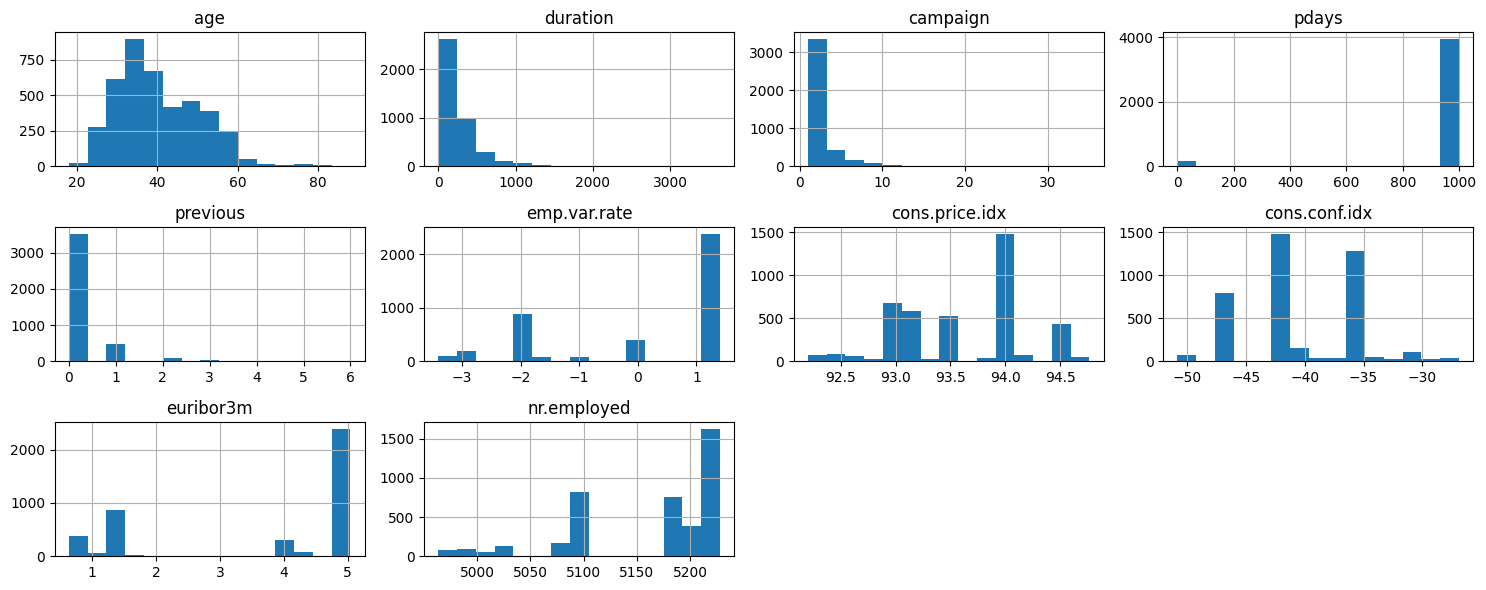

In [105]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_cols)
n_rows = (num_cols + 3) // 4  # Adjust the number of rows to fit all numerical columns
data[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(n_rows, 4))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

## Visualizing Categorical Data

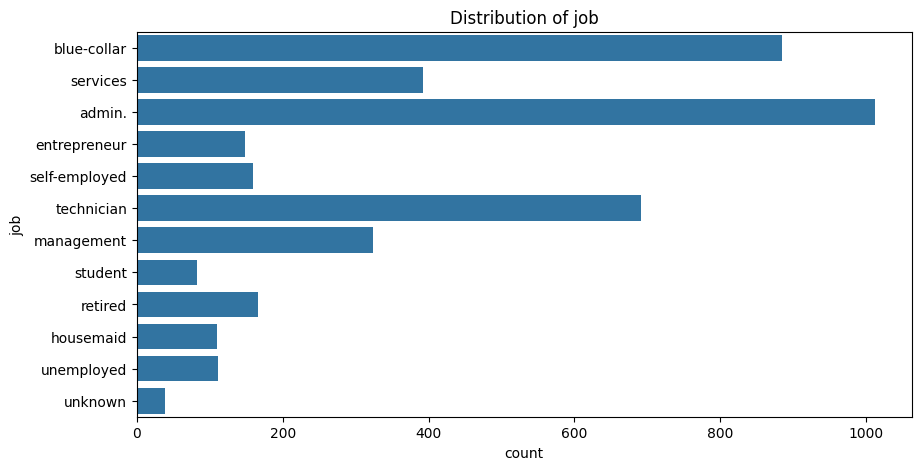

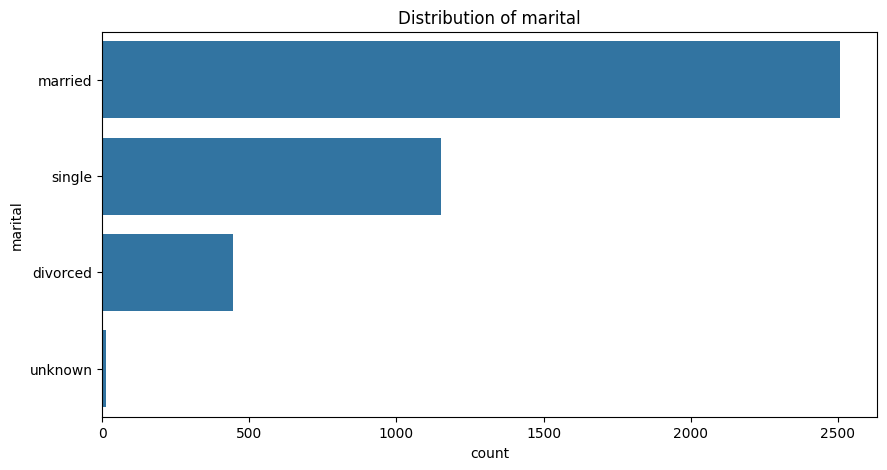

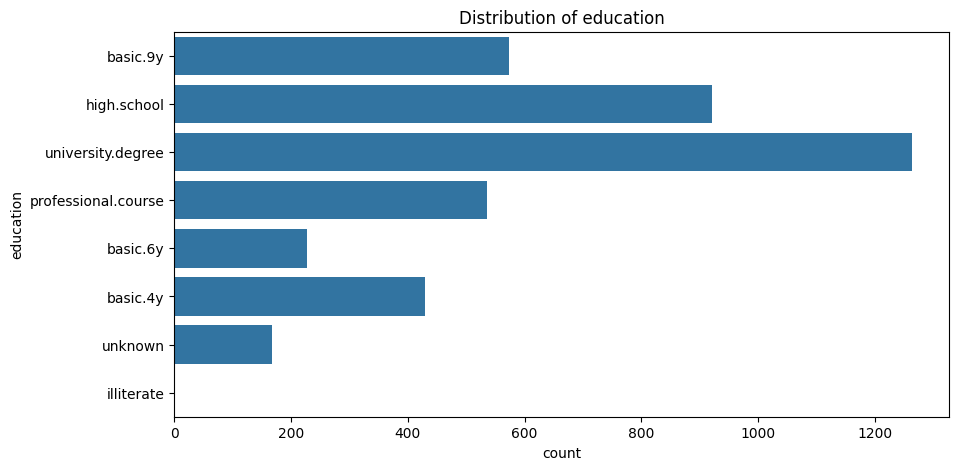

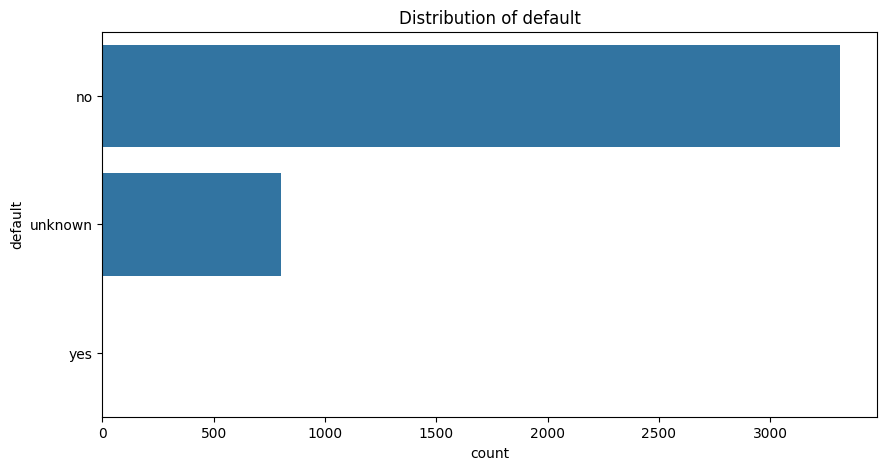

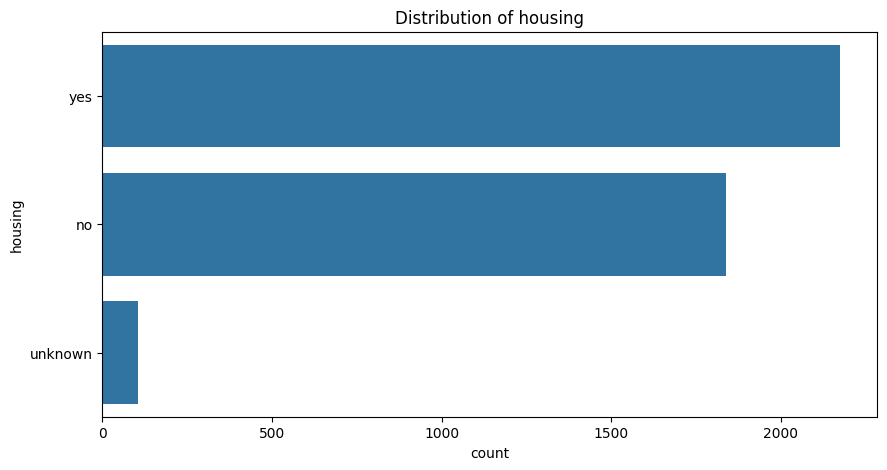

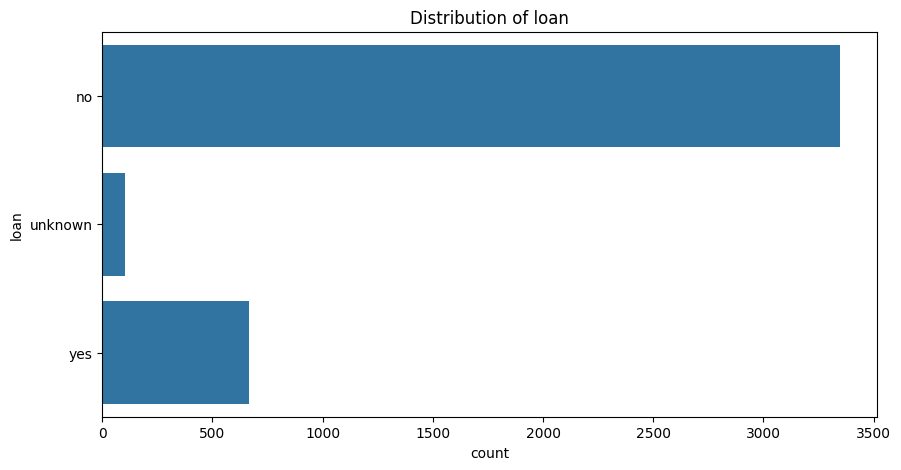

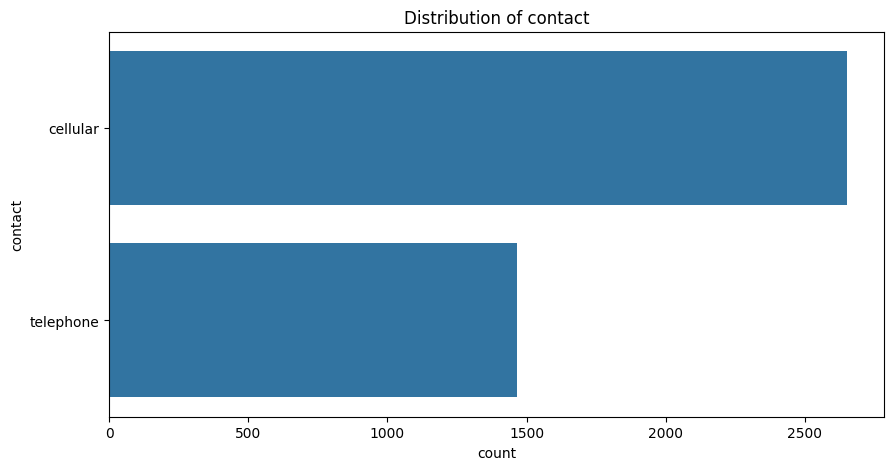

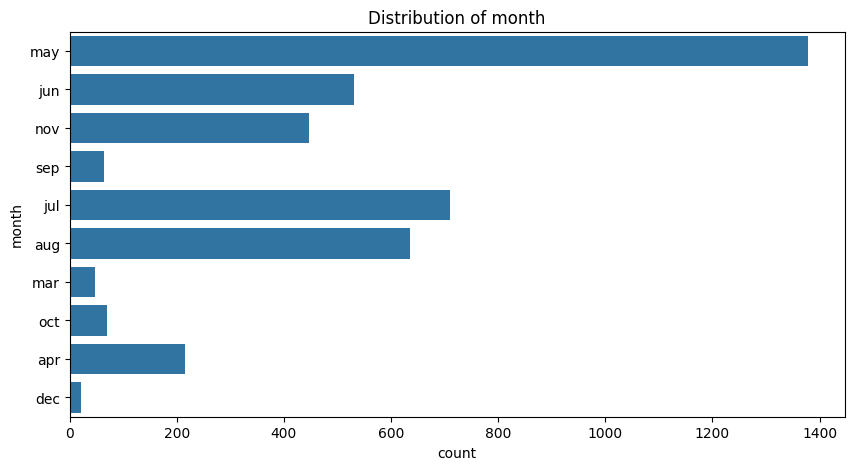

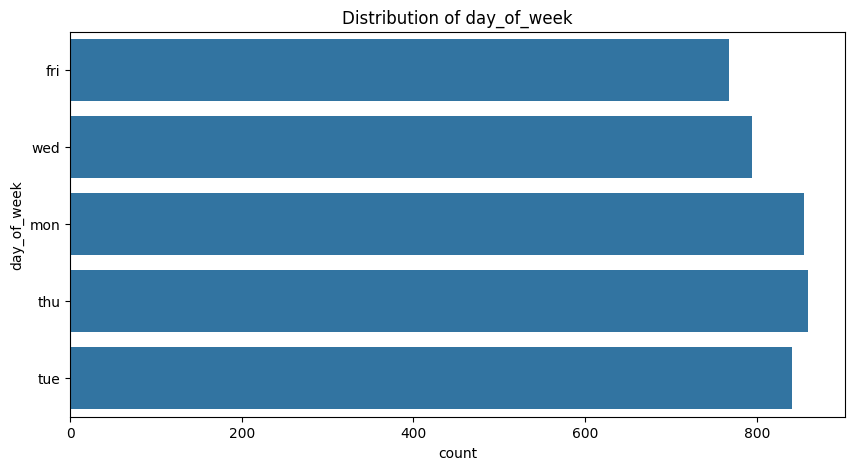

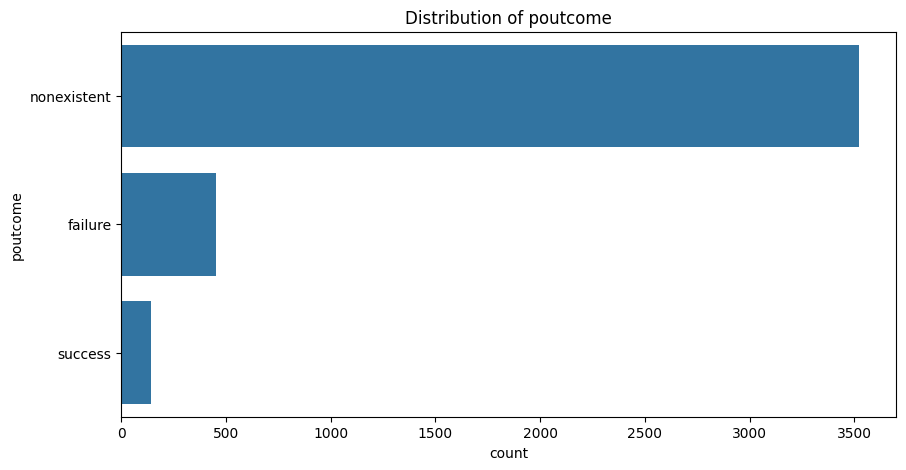

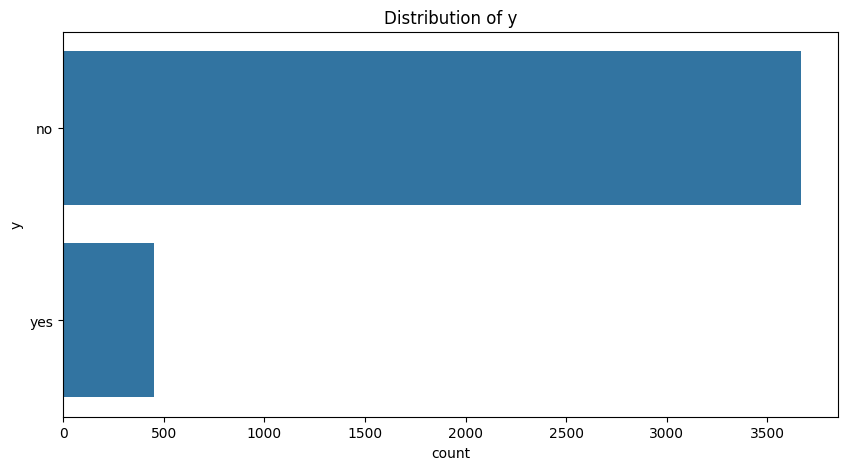

In [106]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()


## Identify Numerical and Categorical Columns

In [107]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

## Feature Scaling

In [108]:
numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Training the Decision Tree Classification model on the Training set

In [109]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=0))
])


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=0))])

In [112]:
y_pred = model.predict(X_test)

## Making the Confusion Matrix

In [113]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[698  50]
 [ 35  41]]


## Visualizing Confusion Matrix


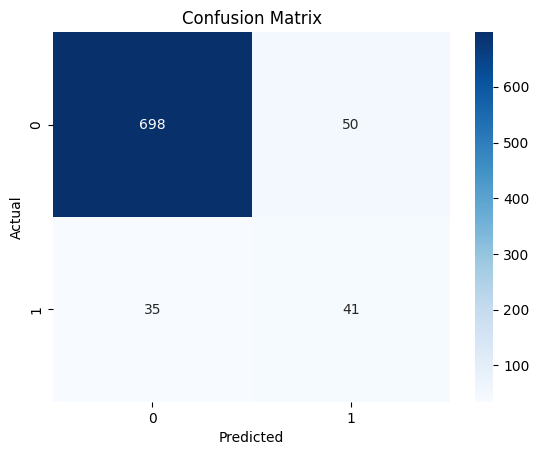

In [114]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Classification Report

In [115]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

          no       0.95      0.93      0.94       748
         yes       0.45      0.54      0.49        76

    accuracy                           0.90       824
   macro avg       0.70      0.74      0.72       824
weighted avg       0.91      0.90      0.90       824



## Accuracy Score of the Model

In [116]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8968446601941747


## Cross-Validation

In [117]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross-validation scores: ', cv_scores)
print('Mean cross-validation score: ', cv_scores.mean())

Cross-validation scores:  [0.88713592 0.88349515 0.89320388 0.88592233 0.89307412]
Mean cross-validation score:  0.8885662801259894


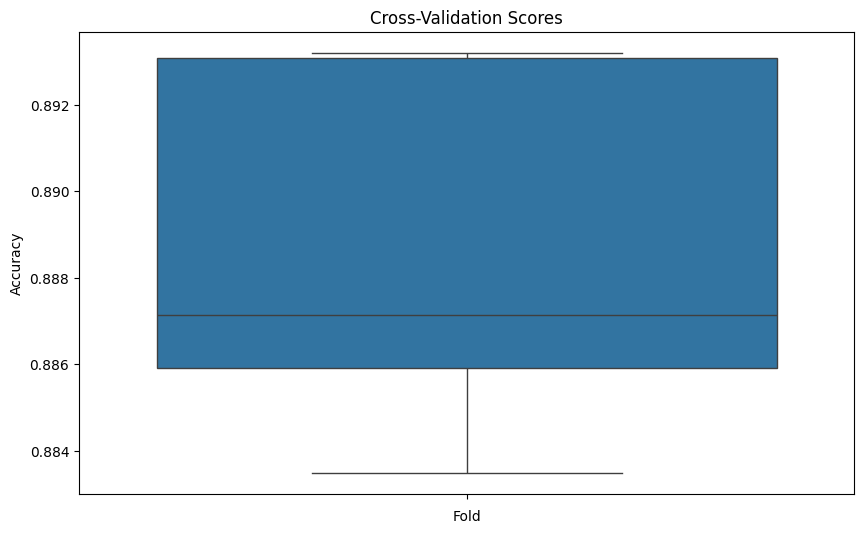

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_scores)
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show ()